# Setting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.stats import norm
from math import ceil, floor

sigma1 = np.sqrt(5.00)
x1 = np.arange(-3000 / sigma1**2, 3001 / sigma1**2 , 1 / sigma1**2)  # range of x for the first distribution

# Define the discrete distributions (Gaussian-like)
dist1 = np.exp(-(x1 * sigma1**2)**2 / (2 * sigma1**2))
dist1 /= dist1.sum()  # Normalize

# Compute variances
var_X = np.sum(x1**2 * dist1)
print(var_X)

# Define the values and variances for the two discrete distributions
sigma2 = np.sqrt(.00)
x2 = np.arange(-3000 / sigma2**2, 3001 / sigma2**2 , 1 / sigma2**2)  # range of x for the second distribution

dist2 = np.exp(-(x2 * sigma2**2)**2 / (2 * sigma2**2))
dist2 /= dist2.sum()  # Normalize

# Compute variances
var_Y = np.sum(x2**2 * dist2)
print(var_Y)

n = 8

# Normalize the convolution to represent (X + Y) / sqrt(var_X + var_Y)
norm_factor = np.sqrt((n+1) * var_X + (n+1) * var_Y)


0.19999999999999998
0.19999999999999998


In [ ]:
x1 = np.arange(-200 / (norm_factor * sigma1**2 ), 201 / (norm_factor * sigma1**2 ) , 1 / (norm_factor * sigma1**2 ))  # range of x for the first distribution

# Define the discrete distributions (Gaussian-like)
dist1 = np.exp(-(x1 * (norm_factor * sigma1**2 ))**2 / (2 * sigma1**2 ))
dist1 /= dist1.sum()  # Normalize

convolution = dist1

# Define the values and variances for the two discrete distributions
x2 = np.arange(-200 / (norm_factor * sigma2**2 ), 201 / (norm_factor * sigma2**2 ), 1 / (norm_factor * sigma2**2 ))  # range of x for the second distribution
print(len(x2))

dist2 = np.exp(-(x2 * (norm_factor * sigma2**2 ))**2 / (2 * sigma2**2 ))
dist2 /= dist2.sum()  # Normalize

convolution = convolve(convolution, dist2, mode='full')
print(len(convolution))


#n = composite - 1
n = 8

for i in range(n):
  # Compute the convolution of the two distributions
  convolution = convolve(convolution, dist1, mode='full')

  # Compute the convolution of the two distributions
  convolution = convolve(convolution, dist2, mode='full')

  print(len(convolution))


401
801


# Compute Lattice

In [ ]:
L = norm_factor * sigma1**2
#
print(L)

9.48683298050514


# Plot

In [ ]:
# Adjust the scale for the normalized convolution
x3 = np.linspace( -(len(convolution) - 1)/(2 * L), (len(convolution) - 1)/(2 * L), len(convolution))  # Adjust the range as needed
print(x3)
print(len(x3))

[-42.16370214 -42.05829288 -41.95288362 -41.84747437 -41.74206511
 -41.63665586 -41.5312466  -41.42583735 -41.32042809 -41.21501884
 -41.10960958 -41.00420033 -40.89879107 -40.79338182 -40.68797256
 -40.58256331 -40.47715405 -40.37174479 -40.26633554 -40.16092628
 -40.05551703 -39.95010777 -39.84469852 -39.73928926 -39.63388001
 -39.52847075 -39.4230615  -39.31765224 -39.21224299 -39.10683373
 -39.00142448 -38.89601522 -38.79060596 -38.68519671 -38.57978745
 -38.4743782  -38.36896894 -38.26355969 -38.15815043 -38.05274118
 -37.94733192 -37.84192267 -37.73651341 -37.63110416 -37.5256949
 -37.42028565 -37.31487639 -37.20946713 -37.10405788 -36.99864862
 -36.89323937 -36.78783011 -36.68242086 -36.5770116  -36.47160235
 -36.36619309 -36.26078384 -36.15537458 -36.04996533 -35.94455607
 -35.83914682 -35.73373756 -35.6283283  -35.52291905 -35.41750979
 -35.31210054 -35.20669128 -35.10128203 -34.99587277 -34.89046352
 -34.78505426 -34.67964501 -34.57423575 -34.4688265  -34.36341724
 -34.258007

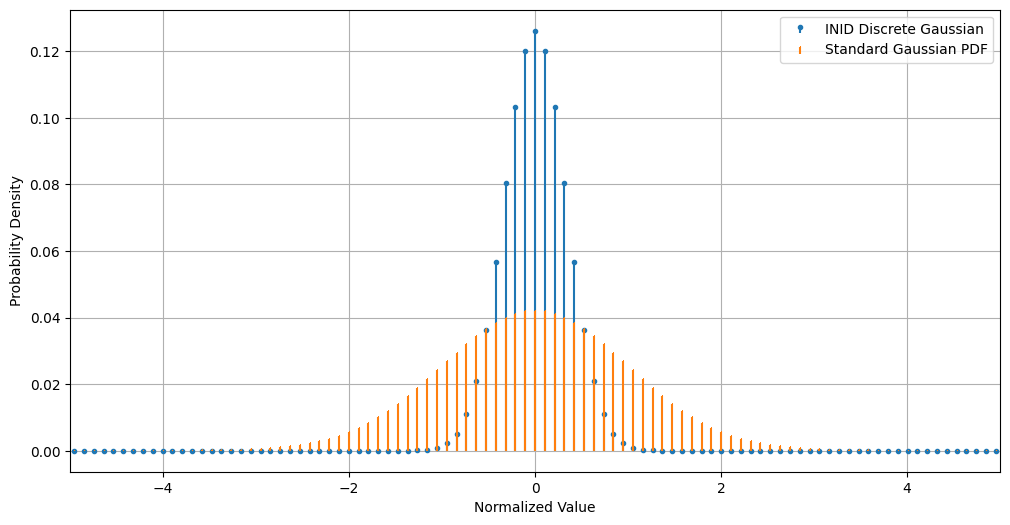

In [ ]:
# Plotting using stem
plt.figure(figsize=(12, 6))

# Plot using plt.stem with '<' and '>' markers
plt.stem(x3, convolution, linefmt='C0-', markerfmt='C0.', basefmt=" ", label='INID Discrete Gaussian')
plt.stem(x3, 1/L * norm.pdf(x3), linefmt='C1-', markerfmt='C1,', basefmt=" ", label='Standard Gaussian PDF')

plt.xlabel('Normalized Value')
plt.ylabel('Probability Density')

plt.xlim(-5, 5)
plt.grid(True)
plt.legend()
plt.show()
